Glosary of League of Legends terms (spanish source and description, but english abbreviations):
    
https://www.marca.com/esports/league-of-legends/2019/05/31/5cf167ad22601d8f668b45e8.html

In [414]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
import numpy as np
from scipy.stats import iqr
import seaborn as sns

In [415]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [416]:
RANDOM_STATE = 117
sns.set_style('darkgrid')

In [417]:
os.listdir()

['.ipynb_checkpoints',
 'Diamond ranked players analysis.ipynb',
 'high_diamond_ranked_10min.csv']

In [418]:
data = pd.read_csv('high_diamond_ranked_10min.csv')
data.set_index("gameId", inplace=True)
rows, cols = data.shape
print(rows, cols)
data.head()

9879 39


,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,,,,,,,,,,,,,,,,,,,,,
4519157822,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
4523371949,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
4521474530,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
4524384067,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4436033771,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [419]:
data.describe().T.drop(["mean", "count"], axis=1)

,std,min,25%,50%,75%,max
blueWins,0.500024,0.0,0.00,0.0,1.00,1.0
blueWardsPlaced,18.019177,5.0,14.00,16.0,20.00,250.0
blueWardsDestroyed,2.174998,0.0,1.00,3.0,4.00,27.0
blueFirstBlood,0.500002,0.0,0.00,1.0,1.00,1.0
blueKills,3.011028,0.0,4.00,6.0,8.00,22.0
blueDeaths,2.933818,0.0,4.00,6.0,8.00,22.0
blueAssists,4.064520,0.0,4.00,6.0,9.00,29.0
blueEliteMonsters,0.625527,0.0,0.00,0.0,1.00,2.0
blueDragons,0.480597,0.0,0.00,0.0,1.00,1.0
blueHeralds,0.390712,0.0,0.00,0.0,0.00,1.0


Info about null-value content and dtypes

In [420]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9879 entries, 4519157822 to 4523772935
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   f

There are no null-values

Check number of unnique values

In [421]:
temp_cat_cols = data.nunique().sort_values() <= 20
temp_cat_cols = temp_cat_cols[temp_cat_cols].index.tolist()
data.nunique().sort_values()

blueWins                           2
redHeralds                         2
redDragons                         2
blueFirstBlood                     2
redFirstBlood                      2
blueDragons                        2
blueHeralds                        2
redEliteMonsters                   3
redTowersDestroyed                 3
blueEliteMonsters                  3
blueTowersDestroyed                5
blueAvgLevel                      17
redAvgLevel                       18
blueKills                         21
redDeaths                         21
redKills                          21
blueDeaths                        21
redWardsDestroyed                 25
blueWardsDestroyed                27
redAssists                        28
blueAssists                       30
blueTotalJungleMinionsKilled      74
redTotalJungleMinionsKilled       75
blueWardsPlaced                  147
blueCSPerMin                     148
blueTotalMinionsKilled           148
redWardsPlaced                   151
r

Let's temporary consider that columns with n_unique values greater than 20 are categorical dtypes, in order to get some insight from their values.

In [422]:
data[temp_cat_cols].apply(pd.unique)

blueWins                                                          [0, 1]
redHeralds                                                        [0, 1]
redDragons                                                        [0, 1]
blueFirstBlood                                                    [1, 0]
redFirstBlood                                                     [0, 1]
blueDragons                                                       [0, 1]
blueHeralds                                                       [0, 1]
redEliteMonsters                                               [0, 2, 1]
redTowersDestroyed                                             [0, 1, 2]
blueEliteMonsters                                              [0, 1, 2]
blueTowersDestroyed                                      [0, 1, 2, 3, 4]
blueAvgLevel           [6.6, 6.4, 7.0, 6.8, 7.2, 7.4, 7.6, 6.2, 7.8, ...
redAvgLevel            [6.8, 7.0, 6.4, 6.6, 7.2, 7.4, 6.2, 7.6, 7.8, ...
dtype: object

1. Columns blueWins, blueFirstBlood, redFirstBlood are binary (boolean) column which mark team that acomplish a certain goal, like winning the game or killing a monster to get beneficial buffs.

2. Columns redEliteMonsters, redTowersDestroyed, blueEliteMonsters, blueHeralds, blueDragons, redHeralds, redDragons describe the number of monsters or buildings destroid. Therefore those columns are ordinal data.

In [423]:
bool_cols = ["blueWins", "blueFirstBlood"]

We can see that some columns could be redundant and calculated from others, for example redGoldPerMin is extracted from redTotalGold columns. Let's ckeck those redundant columns and end up dropping them if necessary:

In detail, we will check these columns:

1) $redGoldPerMin = \frac{redTotalGold}{10}$

2) $redGoldDiff = redTotalGold - blueTotalGold$

3) $redExperienceDiff = redTotalExperience-blueTotalExperience$

4) $redCSPerMin = \frac{redTotalJungleMinionsKilled}{10}$

5) $redGoldDiff = -blueGoldDiff$

In [424]:
(data.redGoldPerMin == data.redTotalGold.div(10)).all()

True

In [425]:
(data.redGoldDiff == data.redTotalGold - data.blueTotalGold).all()

True

In [426]:
(data.redExperienceDiff == data.redTotalExperience - data.blueTotalExperience).all()

True

In [427]:
(data.redCSPerMin == data.redTotalMinionsKilled.div(10)).all()

True

In [428]:
((data.redGoldDiff + data.blueGoldDiff) == 0).all()

True

In [429]:
((data.redHeralds + data.blueHeralds) < 2).all()

True

We can confirm that redGoldPerMi, redGoldDiff, redExperienceDiff, redCSPerMin can be calculated from other columns.

Consideratens:

1. Difference columns (either of blue or red) are useful because gather information from 2 columns in 1. We only take one of them.

2. TotalGold and TotalExperience (both of blue and red) can be dropped. On the other hand, columns calculated from other columns divided by 10 are not that relevant. We can dropped them (redCSPerMin, redGoldPerMin).

From know on, we will only take columns with data from blue team over red team in cases where either one of them are redundant and full info can be acquired from one column.

In [430]:
redundant_cols = ["redTotalGold", 
                  "redTotalExperience",
                  "redExperienceDiff",
                  "blueTotalGold", 
                  "blueTotalExperience",
                  "redGoldPerMin", 
                  "blueGoldPerMin",
                  "redCSPerMin",
                  "blueCSPerMin",
                  "redFirstBlood",
                  "redGoldDiff"
                 ]
#data.drop(redundant_cols, axis=1, inplace=True)
data.shape

(9879, 39)

#### Change DataTypes

In [431]:
# Categorical (boolean)
data[bool_cols] = data[bool_cols].astype('category')
data.blueWins.cat.set_categories(["lose", "win"], rename=True)

gameId
4519157822    lose
4523371949    lose
4521474530    lose
4524384067    lose
4436033771    lose
              ... 
4527873286     win
4527797466     win
4527713716    lose
4527628313    lose
4523772935     win
Name: blueWins, Length: 9879, dtype: category
Categories (2, object): ['lose', 'win']

In [432]:
# Categorical (ordered)
ordinal_cols = ["redEliteMonsters", "redTowersDestroyed", "blueEliteMonsters", "blueHeralds", "blueDragons", "redHeralds", "redDragons"]
#data[ordinal_cols].apply(lambda x: x.cat.as_ordered(True))
#data[ordinal_cols].dtypes

In [433]:
#data[ordinal_cols].apply(lambda x: x.cat.ordered)

#### Duplicates

In [434]:
data.duplicated().any()

False

There are no duplicated values.

### Pre-feature engineering

In [435]:
data.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [436]:
data.describe().T.drop("count", axis=1)

,mean,std,min,25%,50%,75%,max
blueWardsPlaced,22.288288,18.019177,5.0,14.00,16.0,20.00,250.0
blueWardsDestroyed,2.824881,2.174998,0.0,1.00,3.0,4.00,27.0
blueKills,6.183925,3.011028,0.0,4.00,6.0,8.00,22.0
blueDeaths,6.137666,2.933818,0.0,4.00,6.0,8.00,22.0
blueAssists,6.645106,4.064520,0.0,4.00,6.0,9.00,29.0
blueEliteMonsters,0.549954,0.625527,0.0,0.00,0.0,1.00,2.0
blueDragons,0.361980,0.480597,0.0,0.00,0.0,1.00,1.0
blueHeralds,0.187974,0.390712,0.0,0.00,0.0,0.00,1.0
blueTowersDestroyed,0.051422,0.244369,0.0,0.00,0.0,0.00,4.0
blueTotalGold,16503.455512,1535.446636,10730.0,15415.50,16398.0,17459.00,23701.0


#### Total gold rate

In [437]:
total_gold = data.blueTotalGold + data.redTotalGold
data['blue_total_gold_rate'] = data.blueTotalGold / total_gold
data['red_total_gold_rate'] = data.redTotalGold / total_gold

In [438]:
data['total_gold_rate'] = data.blue_total_gold_rate / data.red_total_gold_rate

#### Total experience rate

In [439]:
total_exp = data.blueTotalExperience + data.redTotalExperience
data['blue_total_exp_rate'] = data.blueTotalExperience / total_exp
data['red_total_exp_rate'] = data.redTotalExperience / total_exp

In [440]:
data['total_exp_rate'] = data.blue_total_exp_rate / data.red_total_exp_rate

#### Kill to death rate

In [441]:
data['blueKD_rate'] = data.blueKills / (1 + data.blueDeaths)
data['redKD_rate'] = data.redKills / (1 + data.redDeaths)

In [442]:
data['kd_rate'] = data.blueKD_rate / (1 + data.redKD_rate)

#### Assist to kill rate

In [443]:
data['blueAK_rate'] = data.blueAssists / (1 + data.blueKills)
data['redAK_rate'] = data.redAssists / (1 + data.redKills)

In [444]:
data['ak_rate'] = data.blueAK_rate / (1 + data.redAK_rate)

#### Minion to jungle minion rate

In [445]:
data['blue_minion_to_jungle_rate'] = data.blueTotalMinionsKilled / (1 + data.blueTotalJungleMinionsKilled)
data['red_minion_to_jungle_rate'] = data.redTotalMinionsKilled / (1 + data.redTotalJungleMinionsKilled)

In [446]:
data['minion_to_jungle_rate'] = data.blue_minion_to_jungle_rate / data.red_minion_to_jungle_rate

#### Total minions killed diff

In [447]:
data['blueTotalMinionsKilledDiff'] = data.blueTotalMinionsKilled - data.redTotalMinionsKilled

#### Minions rate

In [448]:
data["cs_per_min"] = data.blueCSPerMin / data.redCSPerMin

#### Gold per min rate

In [449]:
data["gold_pm_rate"] = data.blueGoldPerMin / data.redGoldPerMin

#### Level rate

In [450]:
data["avg_level_rate"] = data["blueAvgLevel"] / data["redAvgLevel"]

Cols to drop

In [451]:
"""cols_to_drop = ["blueKills", 
                "blueDeaths", 
                "redKills", 
                "redDeaths", 
                "blueAssists", 
                "redAssists", 
                "blueTotalMinionsKilled", 
                "redTotalMinionsKilled",
                "blueTotalJungleMinionsKilled",
                "redTotalJungleMinionsKilled",
               ]"""

cols_to_drop = ["blueKills", 
                "blueDeaths", 
                "redKills", 
                "redDeaths", 
                "blueAssists", 
                "redAssists", 
                "blueTotalMinionsKilled", 
                "redTotalMinionsKilled",
                "blueTotalJungleMinionsKilled",
                "redTotalJungleMinionsKilled",
                
                "blue_total_gold_rate",
                "red_total_gold_rate",
                "blue_total_exp_rate",
                "red_total_exp_rate",
                "blueKD_rate",
                "redKD_rate",
                "blueKD_rate",
                "redKD_rate",
                "blueAK_rate",
                "redAK_rate",
                
                "blue_minion_to_jungle_rate",
                "red_minion_to_jungle_rate",
                
                "redGoldDiff",
                "blueGoldDiff",
                "redExperienceDiff",
                "blueExperienceDiff",
                "blueTotalExperience",
                "redTotalExperience",
                # Doubt
                "blueAvgLevel",
                "redAvgLevel",
                "blueTotalMinionsKilledDiff",
                "redCSPerMin",
                "blueCSPerMin",
                "redGoldPerMin", 
                "blueGoldPerMin", 
                "redTotalGold",
                "blueTotalGold",
                
                "redFirstBlood",
                "blueWardsPlaced",
                "blueWardsDestroyed",
                "redTowersDestroyed",
                "redWardsPlaced",
                "redWardsDestroyed",
                "redDragons",
                "redHeralds",
                "redEliteMonsters"
               ]

data.drop(cols_to_drop, axis=1, inplace=True)

In [452]:
data.columns

Index(['blueWins', 'blueFirstBlood', 'blueEliteMonsters', 'blueDragons',
       'blueHeralds', 'blueTowersDestroyed', 'total_gold_rate',
       'total_exp_rate', 'kd_rate', 'ak_rate', 'minion_to_jungle_rate',
       'cs_per_min', 'gold_pm_rate', 'avg_level_rate'],
      dtype='object')

In [453]:
num_cols = [c for c in data.columns if c not in (ordinal_cols + bool_cols)]
num_cols, len(num_cols)

(['blueTowersDestroyed',
  'total_gold_rate',
  'total_exp_rate',
  'kd_rate',
  'ak_rate',
  'minion_to_jungle_rate',
  'cs_per_min',
  'gold_pm_rate',
  'avg_level_rate'],
 9)

In [391]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_gold_rate,9879.0,1.011637,0.150598,0.497681,0.907911,1.000801,1.102295,1.959020
total_exp_rate,9879.0,1.004009,0.109621,0.537031,0.930463,0.998450,1.070095,1.789775
kd_rate,9879.0,0.707472,0.854525,0.000000,0.224599,0.461538,0.857143,16.000000
ak_rate,9879.0,0.485123,0.220289,0.000000,0.337500,0.466667,0.608696,1.875000
minion_to_jungle_rate,9879.0,1.073720,0.697493,0.112126,0.826252,1.010262,1.237359,42.406639
cs_per_min,9879.0,1.007892,0.150138,0.443350,0.908257,0.995633,1.093957,2.186916
gold_pm_rate,9879.0,1.011637,0.150598,0.497681,0.907911,1.000801,1.102295,1.959020
avg_level_rate,9879.0,1.001094,0.070107,0.648649,0.945946,1.000000,1.031250,1.500000


In [40]:
data.isnull().sum()

blueWins                 0
blueFirstBlood           0
blueEliteMonsters        0
blueDragons              0
blueHeralds              0
redEliteMonsters         0
redDragons               0
redHeralds               0
redTowersDestroyed       0
total_gold_rate          0
total_exp_rate           0
kd_rate                  0
ak_rate                  0
minion_to_jungle_rate    0
cs_per_min               0
gold_pm_rate             0
avg_level_rate           0
dtype: int64

1. *blueWardsPlaced* (*redWardsPlaced*) shows 250 (276) as maximum value, which means players should place wards at a rate of 1 ward per 2-3 secs. This value is highly rare and an unusual strategy to follow. We can drop extreme values from this column.

1. 

## EDA

### Categorical data

How strong is the balance in each column?

In [41]:
data.blueWins.value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

Wins are balanced.

In [42]:
data.blueFirstBlood.value_counts()

1    4987
0    4892
Name: blueFirstBlood, dtype: int64

#### Groupings

Group Wins and firstBlood columns.

In [60]:
data.value_counts(["blueWins", "blueFirstBlood"]).div(rows/100).round(1).sort_index()

blueWins  blueFirstBlood
0         0                 29.9
          1                 20.2
1         0                 19.7
          1                 30.2
dtype: float64

These stats show that when either team wins we have slightly different frequencies.

Red team wins and gets firstBlood => 20 %
Blue team wins and gets firstBlood => 30 %

This does not mean that belonging to either red or blue team has some differential feature.

### Ordinal data

In [61]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

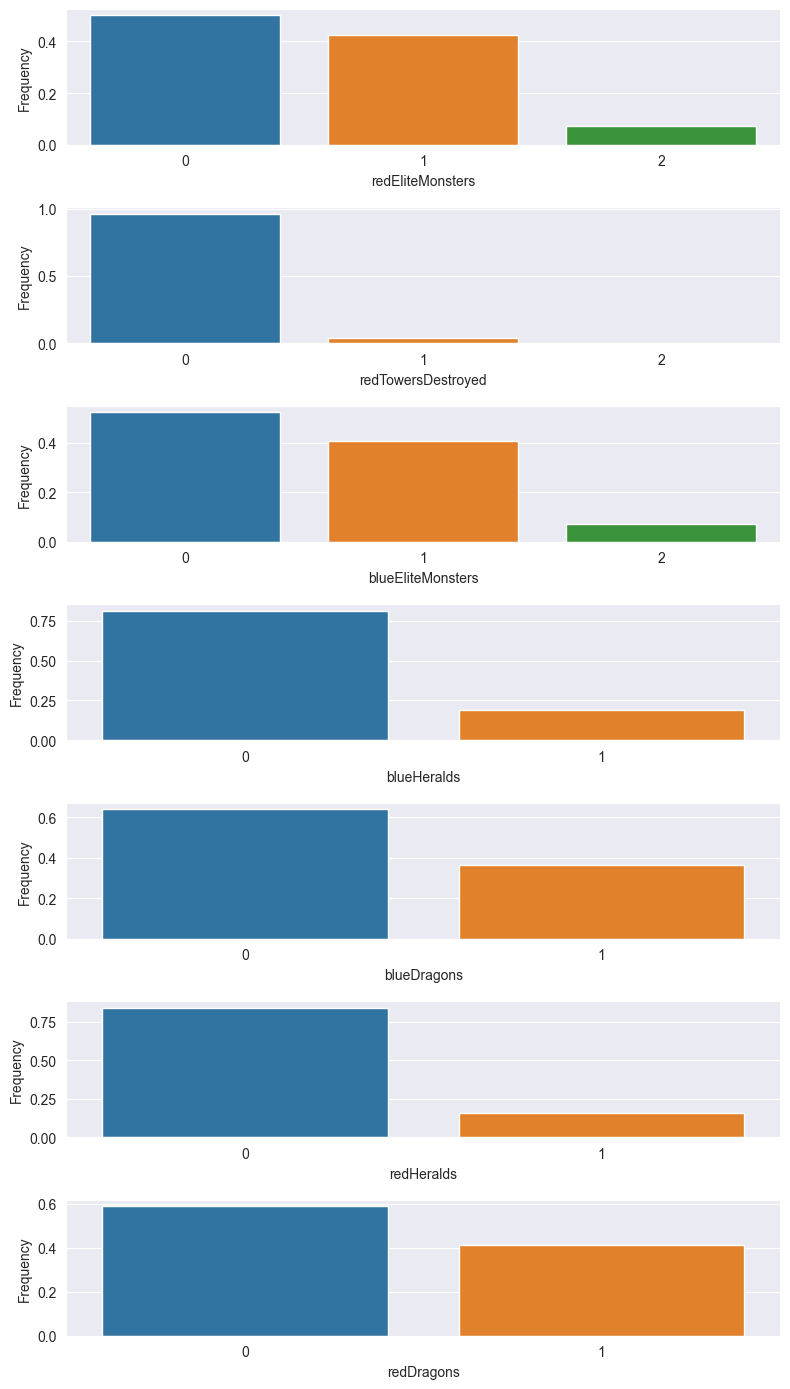

In [62]:
fig, axes1 = plt.subplots(len(ordinal_cols), 1, figsize=(8, 14))

for col, ax in zip(ordinal_cols, axes1):
    freq = data.value_counts(col).to_frame('Frequency').div(rows).reset_index()
    sns.barplot(x=col, y='Frequency', data=freq, ax=ax)
plt.tight_layout()

In [63]:
data['redAllMonsters'] = data.redEliteMonsters + data.redDragons + data.redHeralds + data.redTowersDestroyed
data['blueAllMonsters'] = data.blueEliteMonsters + data.blueDragons + data.blueHeralds + data.blueTowersDestroyed

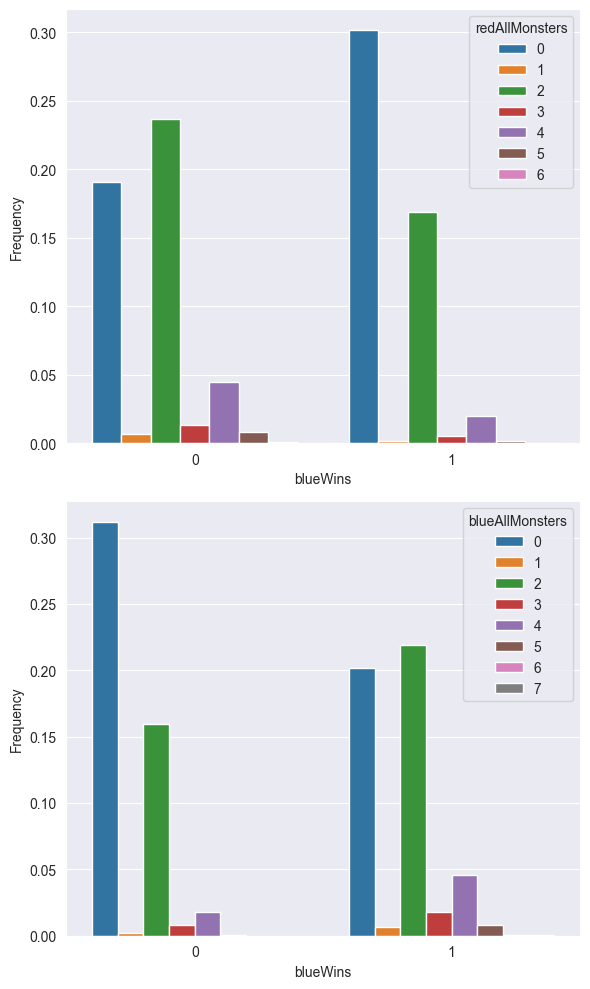

In [64]:
fig, axes2 = plt.subplots(2, 1, figsize=(6, 10))
target = 'blueWins'

for col, ax in zip([c for c in data.columns if 'All' in c] + [target], axes2):
    if col != target:
        freq = data.value_counts([target, col]).to_frame('Frequency').div(rows).reset_index()
        sns.barplot(x=target, y='Frequency', hue=col, data=freq, ax=ax)
plt.tight_layout()

Destroying buildings or killing jungle monsters is increasingly rare, in other words, taking out objectives is less usual.

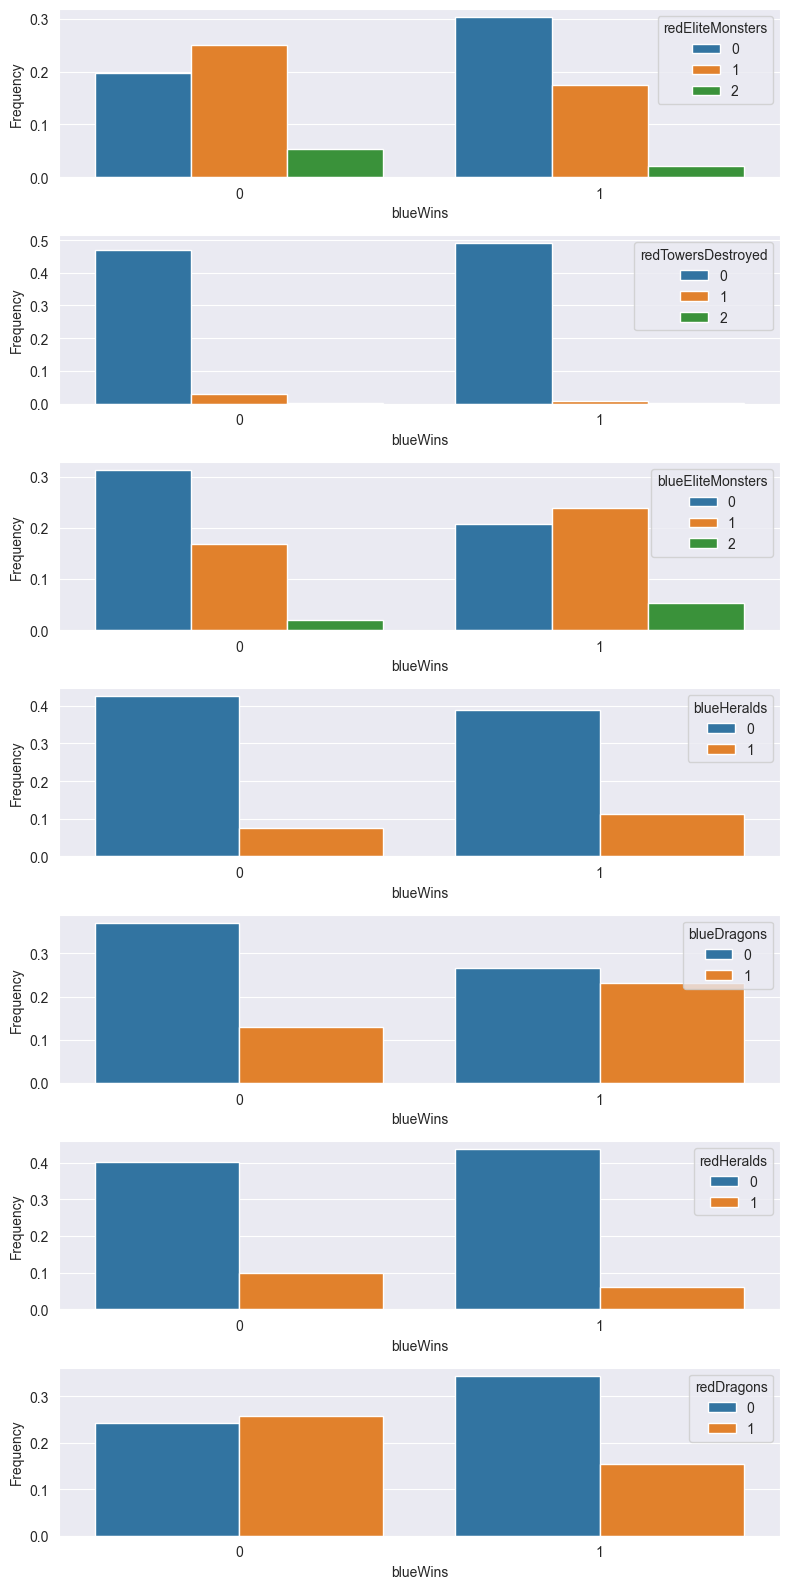

In [65]:
fig, axes3 = plt.subplots(len(ordinal_cols), 1, figsize=(8, 16))
target = "blueWins"

for col, ax in zip(ordinal_cols + [target], axes3):
    if col != target:
        freq = data.value_counts([target, col]).to_frame('Frequency').div(rows).reset_index()
        sns.barplot(x=target, y='Frequency', hue=col, data=freq, ax=ax)
plt.tight_layout()

### Numerical data

In [66]:
data.nunique().sort_values()

total_gold_rate                  1
blueWins                         2
redHeralds                       2
blueFirstBlood                   2
redDragons                       2
blueDragons                      2
blueHeralds                      2
redFirstBlood                    2
redEliteMonsters                 3
redTowersDestroyed               3
blueEliteMonsters                3
blueTowersDestroyed              5
redAllMonsters                   7
blueAllMonsters                  8
blueAvgLevel                    17
redAvgLevel                     18
redWardsDestroyed               25
blueWardsDestroyed              27
redAK_rateCustom               147
blueWardsPlaced                147
blueCSPerMin                   148
redWardsPlaced                 151
redCSPerMin                    153
blueAK_rateCustom              161
redKD_rateCustom               172
blueKD_rateCustom              174
blueTotalMinionsKilledDiff     213
redMiniJung_rateCustom        2880
blueMiniJung_rateCus

Violin plots 

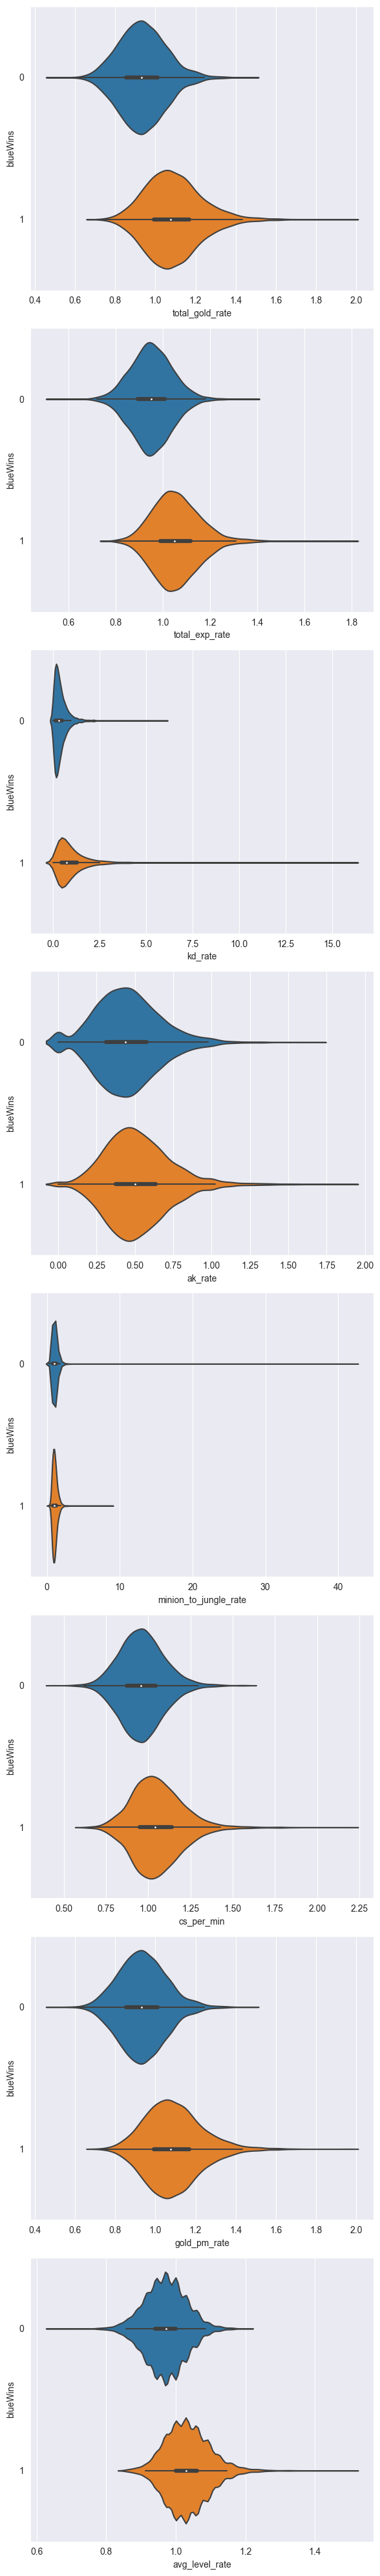

In [124]:
fig, axes4 = plt.subplots(len(num_cols), 1, figsize=(6, 40))
target = "blueWins"

for col, ax in zip(num_cols + [target], axes4):
    if col != target:
        sns.violinplot(y=target, x=col, data=data, ax=ax)
plt.tight_layout()

Boxplot

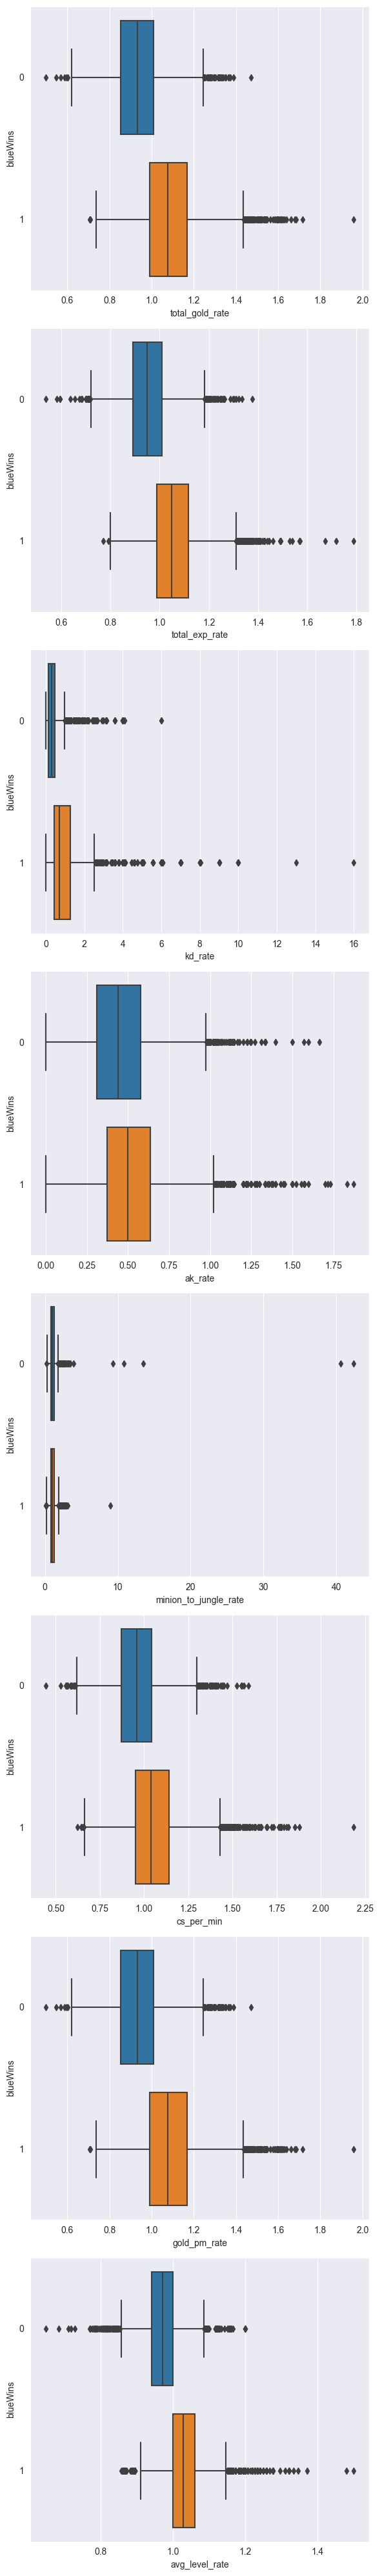

In [125]:
fig, axes5 = plt.subplots(len(num_cols), 1, figsize=(6, 40))
target = "blueWins"

for col, ax in zip(num_cols + [target], axes5):
    if col != target:
        sns.boxplot(y=target, x=col, data=data, ax=ax)
plt.tight_layout()

From both groups of graphs we can summarize the following aspects:

- blue and red wards placed are don't show relevant differences.

### Correlations

#### Among numerical values

(9879, 6)


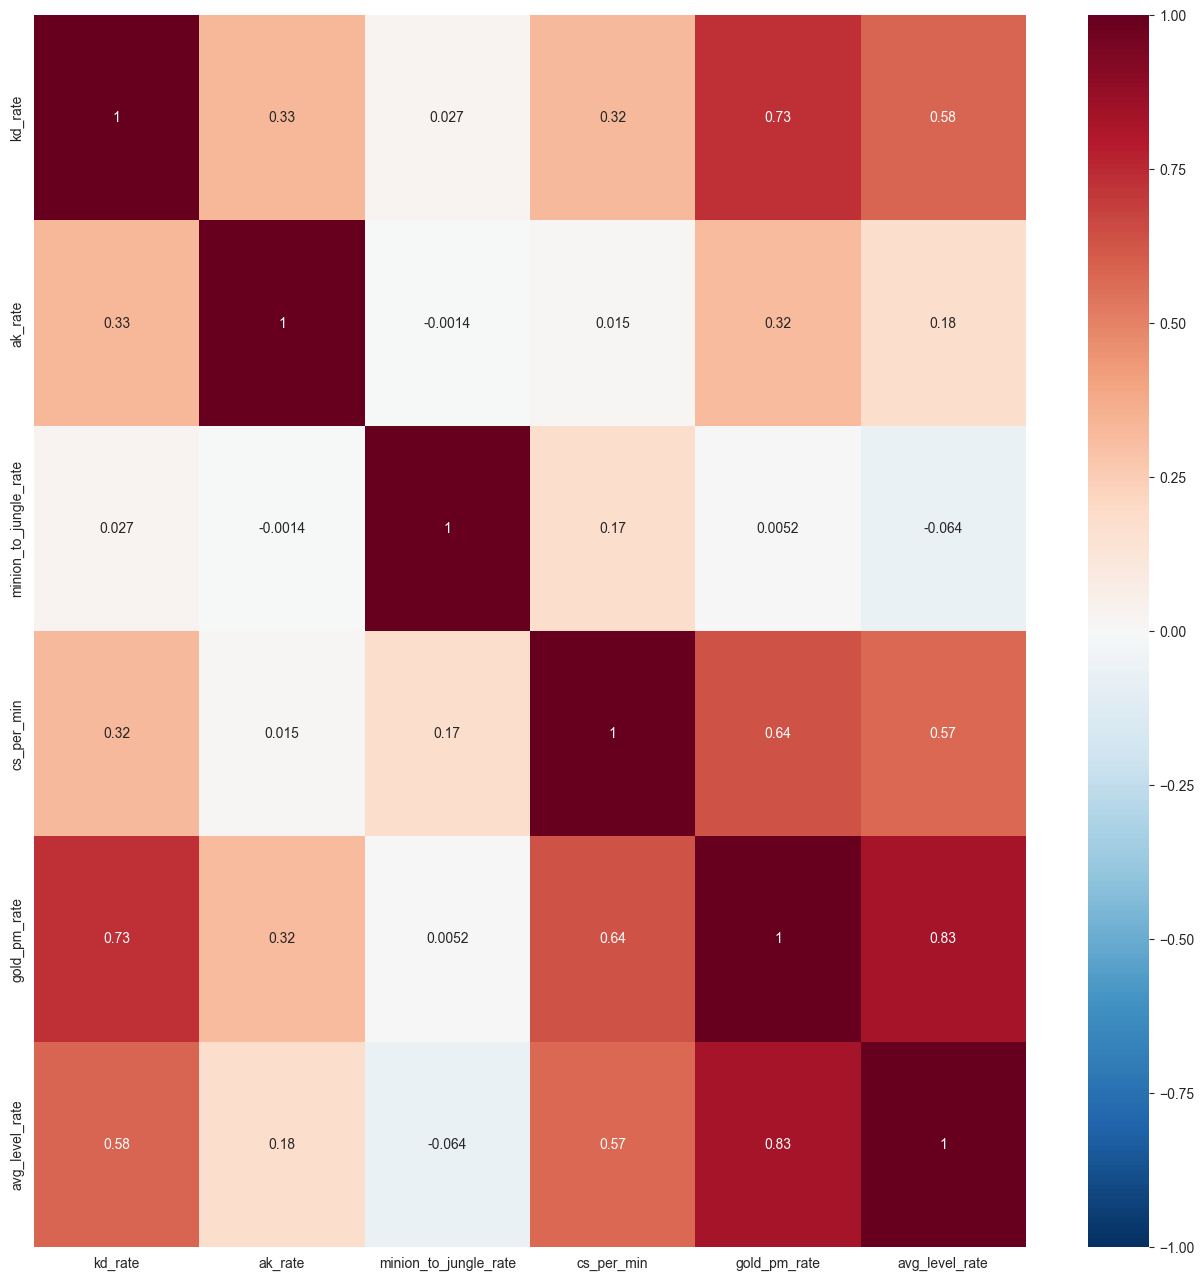

In [174]:
fig, ax5 = plt.subplots(1, 1, figsize=(16, 16))

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = [c for c in data.columns if c not in (ordinal_cols + bool_cols)]

num_data = data.loc[:, num_cols]
print(num_data.shape)

ax5 = sns.heatmap(num_data.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap="RdBu_r") # "YlGnBu"

1. There are no overall high correlations between variables.
1. blueAvgLevel is softly correlated positively to blueKD_rate and negatively to redKD_rate.
1. redAvgLevel is also softly negatively correlated to blueKD_rate and positively to redKD_rate.
1. blueKD_rate (redKD_rate) is softly correlated to redKD_rate (blueAK_rate).
1. Deaths and kills are perfectly correlated, as 1 kill for enemy blue always corresponds to 1 death for enemy red and viceversa. Drop blueDeaths and redDeaths.

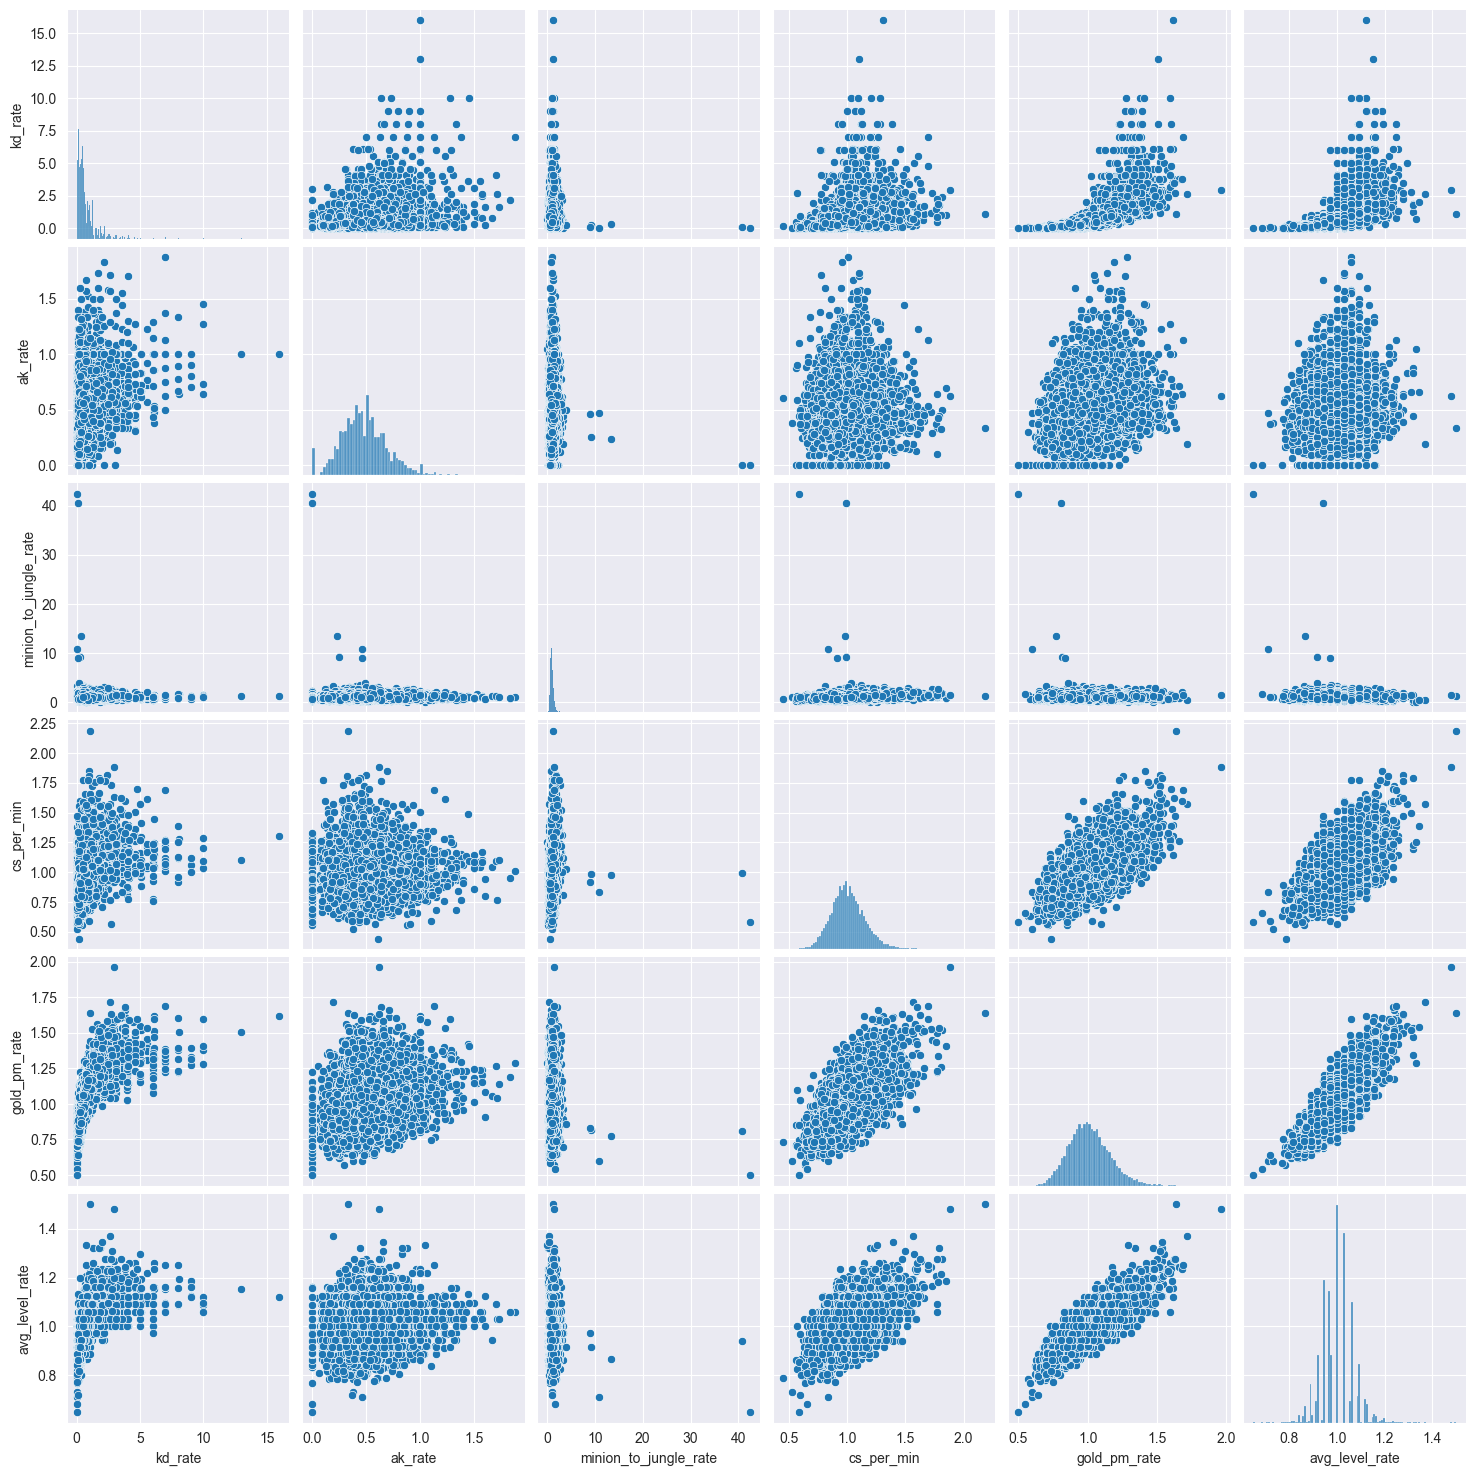

In [217]:
sns.pairplot(data[num_cols])

Review the correlations again after dropping some columns

(9879, 6)


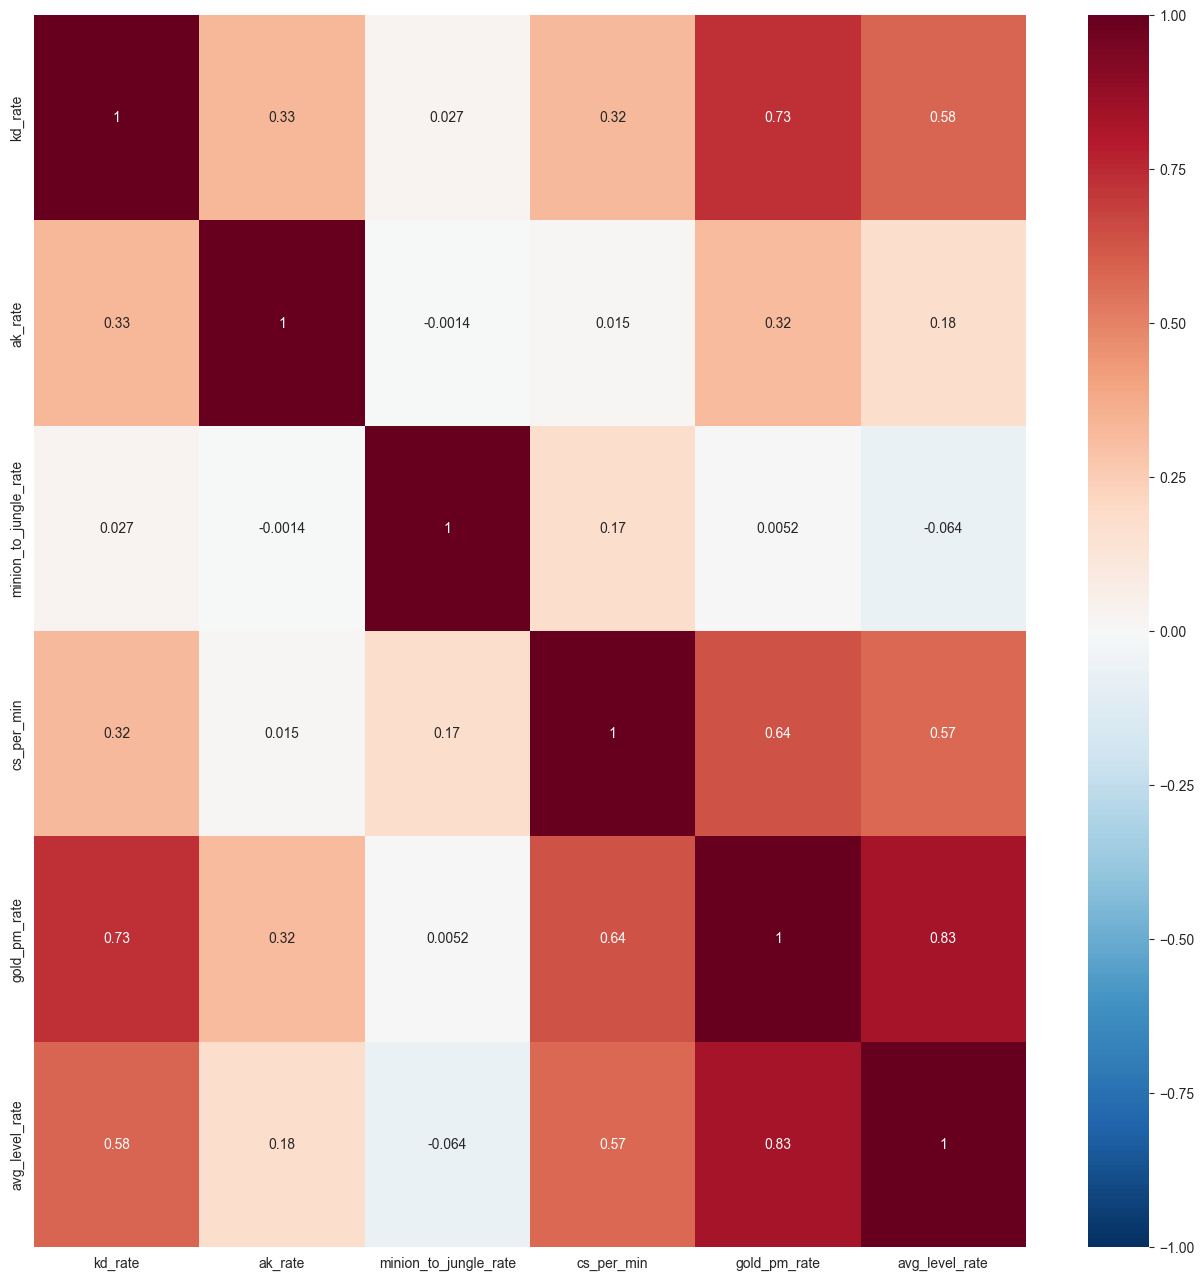

In [218]:
fig, ax5 = plt.subplots(1, 1, figsize=(16, 16))

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = [c for c in data.columns if c not in (ordinal_cols + bool_cols)]

num_data = data.loc[:, num_cols]
print(num_data.shape)

ax5 = sns.heatmap(num_data.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap="RdBu_r") # "YlGnBu"

#### Among numerical values and target

In [332]:
data.blueWins.cat.set_categories([0, 1], rename=True).astype(int)

gameId
4519157822    0
4523371949    0
4521474530    0
4524384067    0
4436033771    0
             ..
4527873286    1
4527797466    1
4527713716    0
4527628313    0
4523772935    1
Name: blueWins, Length: 9879, dtype: int32

In [333]:
from sklearn.feature_selection import f_classif, f_oneway, mutual_info_classif, SelectFromModel, RFE, SelectKBest
from scipy.stats import f_oneway as f_o

In [334]:
data.iloc[:, 1:].apply(lambda x: (f_o(x.values, data.blueWins.cat.set_categories([0, 1], rename=True).astype(int).values))).iloc[0].sort_values()

blueFirstBlood              0.657724
ak_rate                     6.407234
kd_rate                   437.842930
minion_to_jungle_rate    4429.781106
cs_per_min               9384.839162
gold_pm_rate             9518.674176
Name: 0, dtype: float64

In [335]:
data.iloc[:, 1:].apply(lambda x: (f_classif(x.values.reshape(-1, 1), data.blueWins.cat.set_categories([0, 1], rename=True).astype(int).values)))

,blueFirstBlood,kd_rate,ak_rate,minion_to_jungle_rate,cs_per_min,gold_pm_rate
0,[419.16550586048197],[1439.508554632568],[231.32197925033856],[2.771292166209585],[1019.0648268827325],[3448.4574271437777]
1,[2.8610723204462203e-91],[3.539389068739303e-294],[1.1782733793937847e-51],[0.09600037954307336],[6.580312009566465e-213],[0.0]


#### Among categorical features and target

In [336]:
data.loc[:, ordinal_cols].apply(lambda x: (mutual_info_classif(x.values.reshape(-1, 1), data.blueWins.cat.set_categories([0, 1], rename=True).astype(int).values))).iloc[0].sort_values()

KeyError: "None of [Index(['redEliteMonsters', 'redTowersDestroyed', 'blueEliteMonsters',\n       'blueHeralds', 'blueDragons', 'redHeralds', 'redDragons'],\n      dtype='object')] are in the [columns]"

#### Feature engineering 3

In [546]:
rate_cols = [c for c in data.columns if 'rate' in c]
for c in rate_cols:
    data[c + '_sqrt'] = np.sqrt(data[c])
rate_cols

['total_gold_rate',
 'total_exp_rate',
 'kd_rate',
 'ak_rate',
 'minion_to_jungle_rate',
 'gold_pm_rate',
 'avg_level_rate',
 'total_gold_rate_sqrt',
 'total_exp_rate_sqrt',
 'kd_rate_sqrt',
 'ak_rate_sqrt',
 'minion_to_jungle_rate_sqrt',
 'gold_pm_rate_sqrt',
 'avg_level_rate_sqrt',
 'total_gold_rate_sqrt_sqrt',
 'total_exp_rate_sqrt_sqrt',
 'kd_rate_sqrt_sqrt',
 'ak_rate_sqrt_sqrt',
 'minion_to_jungle_rate_sqrt_sqrt',
 'gold_pm_rate_sqrt_sqrt',
 'avg_level_rate_sqrt_sqrt',
 'total_gold_rate_sqrt_sqrt_sqrt',
 'total_exp_rate_sqrt_sqrt_sqrt',
 'kd_rate_sqrt_sqrt_sqrt',
 'ak_rate_sqrt_sqrt_sqrt',
 'minion_to_jungle_rate_sqrt_sqrt_sqrt',
 'gold_pm_rate_sqrt_sqrt_sqrt',
 'avg_level_rate_sqrt_sqrt_sqrt',
 'total_gold_rate_sqrt_sqrt_sqrt_sqrt',
 'total_exp_rate_sqrt_sqrt_sqrt_sqrt',
 'kd_rate_sqrt_sqrt_sqrt_sqrt',
 'ak_rate_sqrt_sqrt_sqrt_sqrt',
 'minion_to_jungle_rate_sqrt_sqrt_sqrt_sqrt',
 'gold_pm_rate_sqrt_sqrt_sqrt_sqrt',
 'avg_level_rate_sqrt_sqrt_sqrt_sqrt',
 'total_gold_rate_sqrt_sq

## Modeling through data

In [394]:
from sklearn.linear_model import LogisticRegression, ARDRegression, BayesianRidge, ElasticNet, Hinge, Huber
from sklearn.linear_model import Lars, LassoLarsIC, LinearRegression, ModifiedHuber, PassiveAggressiveClassifier, RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC, SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_validate, learning_curve, validation_curve, GroupKFold, KFold
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import classification_report, auc, roc_auc_score, roc_curve

In [547]:
data.dtypes

blueWins                                                    category
blueFirstBlood                                                 uint8
blueEliteMonsters                                              int64
blueDragons                                                    uint8
blueHeralds                                                    uint8
                                                              ...   
kd_rate_sqrt_sqrt_sqrt_sqrt_sqrt_sqrt_sqrt                   float64
ak_rate_sqrt_sqrt_sqrt_sqrt_sqrt_sqrt_sqrt                   float64
minion_to_jungle_rate_sqrt_sqrt_sqrt_sqrt_sqrt_sqrt_sqrt     float64
gold_pm_rate_sqrt_sqrt_sqrt_sqrt_sqrt_sqrt_sqrt              float64
avg_level_rate_sqrt_sqrt_sqrt_sqrt_sqrt_sqrt_sqrt            float64
Length: 63, dtype: object

In [395]:
# Num
data.drop(["total_gold_rate", 
           "total_exp_rate",
           "avg_level_rate"
          ], 
          axis=1, inplace=True)

'# Cat and little int\ndata.drop(["redWardsPlaced", \n           "blueWardsPlaced", \n           "redWardsDestroyed", \n           "blueWardsDestroyed",\n           "blue_minion_to_jungle_rate",\n           "red_minion_to_jungle_rate"\n          ], axis=1, inplace=True)'

Extract the data.

In [513]:
dummy_cols = ["blueFirstBlood", 
              "blueDragons",
              "blueHeralds"
             ]
              
cat_cols = ["blueEliteMonsters", 
            "blueTowersDestroyed",
           ]

data[dummy_cols] = pd.get_dummies(data[dummy_cols].astype("category"), 
                                  drop_first=True)

model_cols = data.drop("blueWins", axis=1).columns
# ["gold_pm_rate", "kd_rate"]
X = data.drop("blueWins", axis=1).values
y = data["blueWins"].cat.set_categories([0, 1], rename=True).astype(int).values
X.shape, y.shape

((9879, 20), (9879,))

For now, the data set has many features (28). A suitable strategy to be applied, after the evaluation of based models, would be locate those meaningful features to reduce the size of the model, computations and correlations between independent features.

Split the data into training and test set.

In [514]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    stratify=y, 
                                                    random_state=RANDOM_STATE)

Check distribution of classes in both training and test sets.

In [515]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1]), array([3464, 3451], dtype=int64)),
 (array([0, 1]), array([1485, 1479], dtype=int64)))

Classes are evenly distributed

### Base Models

In [516]:
rf = RandomForestClassifier(random_state=RANDOM_STATE)
lg = LogisticRegression(solver="liblinear", max_iter=500, random_state=RANDOM_STATE)
svc = SVC(kernel='rbf', max_iter=-1, random_state=RANDOM_STATE)

Train, predict test data and accuracy score

In [517]:
rf.fit(X_train, y_train)
rf_pred_test = rf.predict(X_test)
rf.score(X_train, y_train)

0.9998553868402025

In [518]:
lg.fit(X_train, y_train)
lg_pred_test = lg.predict(X_test)
lg.score(X_train, y_train)

0.725234996384671

In [519]:
svc.fit(X_train, y_train)
svc_pred_test = svc.predict(X_test)
svc.score(X_train, y_train)

0.7223427331887202

Classification report: precision, recall, f1-score and accuracy scores

In [520]:
print(classification_report(y_test, rf_pred_test))
print("Roc auc score:", roc_auc_score(y_test, rf_pred_test))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1485
           1       0.74      0.70      0.72      1479

    accuracy                           0.73      2964
   macro avg       0.73      0.73      0.73      2964
weighted avg       0.73      0.73      0.73      2964

Roc auc score: 0.7293639573558438


In [521]:
print(classification_report(y_test, lg_pred_test))
print("Roc auc score:", roc_auc_score(y_test, lg_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1485
           1       0.76      0.71      0.74      1479

    accuracy                           0.74      2964
   macro avg       0.75      0.74      0.74      2964
weighted avg       0.75      0.74      0.74      2964

Roc auc score: 0.7442033588078214


In [522]:
#print(classification_report(y_test, svc_pred_test))
#print("Roc auc score:", roc_auc_score(y_test, svc_pred_test))

### Feature Selection

#### Through model

In [523]:
rf = RandomForestClassifier(random_state=RANDOM_STATE)

In [524]:
model_reducer = SelectFromModel(rf, threshold="median", max_features=8).fit(X_train, y_train)

In [525]:
X_train_reduModel = model_reducer.transform(X_train)
X_test_reduModel = model_reducer.transform(X_test)
X_train_reduModel.shape, X_test_reduModel.shape

((6915, 8), (2964, 8))

In [526]:
rf.fit(X_train_reduModel, y_train)
rf_pred_test_redu = rf.predict(X_test_reduModel)
rf.score(X_train_reduModel, y_train)

1.0

In [527]:
print(classification_report(y_test, rf_pred_test_redu))
print("Roc auc score:", roc_auc_score(y_test, rf_pred_test_redu))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1485
           1       0.73      0.71      0.72      1479

    accuracy                           0.73      2964
   macro avg       0.73      0.73      0.73      2964
weighted avg       0.73      0.73      0.73      2964

Roc auc score: 0.7263555091141299


#### Through ANOVA

In [492]:
rf = RandomForestClassifier(random_state=RANDOM_STATE)

In [493]:
model_reducer_anova = SelectKBest(f_classif, k=4).fit(X_train, y_train)

In [494]:
X_train_reduAnova = model_reducer_anova.transform(X_train)
X_test_reduAnova = model_reducer_anova.transform(X_test)
X_train_reduAnova.shape, X_test_reduAnova.shape

((6915, 4), (2964, 4))

In [495]:
rf.fit(X_train_reduAnova, y_train)
rf_pred_test_redu = rf.predict(X_test_reduAnova)
rf.score(X_train_reduAnova, y_train)

0.9998553868402025

In [496]:
print(classification_report(y_test, rf_pred_test_redu))
print("Roc auc score:", roc_auc_score(y_test, rf_pred_test_redu))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1485
           1       0.71      0.70      0.71      1479

    accuracy                           0.71      2964
   macro avg       0.71      0.71      0.71      2964
weighted avg       0.71      0.71      0.71      2964

Roc auc score: 0.7078137698827355


#### Parameter Optimization

In [497]:
rf = RandomForestClassifier(random_state=RANDOM_STATE)

In [528]:
params = {'n_estimators': [100, 150, 200, 250], 
          'max_depth': [3, 4, 5, 7],
         }
scoring_metric = ['f1', 'precision', 'recall']
scoring_metric = "precision"
refit_metric = "precision"

rf_gridSearch = GridSearchCV(rf, 
                             param_grid=params, 
                             scoring=scoring_metric, 
                             refit=refit_metric, 
                             cv=5)

In [529]:
rf_gridSearch.fit(X_train, y_train)
rf_gridSearch_pred = rf_gridSearch.predict(X_test)
rf_gridSearch.score(X_train, y_train)

0.734338747099768

In [532]:
depth, n_estimators = list(rf_gridSearch.best_params_.values())
depth, n_estimators

(5, 100)

In [533]:
print(classification_report(y_test, rf_gridSearch_pred))
print("Roc auc score:", roc_auc_score(y_test, rf_gridSearch_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75      1485
           1       0.75      0.72      0.73      1479

    accuracy                           0.74      2964
   macro avg       0.74      0.74      0.74      2964
weighted avg       0.74      0.74      0.74      2964

Roc auc score: 0.740511948422699


#### Feature Importance through Random Forest

In [534]:
def plot_importance(algo, n_show=8, return_importance=False, rot=45):
    importances_rf = algo.feature_importances_
    importances_rf_ordered = importances_rf.copy()
    importances_rf_ordered = np.sort(importances_rf_ordered)[::-1]
    indices = np.argsort(importances_rf)[::-1]
    
    plt.bar(x=model_cols[indices[:n_show]], height=importances_rf_ordered[:n_show])
    plt.xticks(rotation=rot);
    if return_importance:
        return importances_rf_ordered, model_cols[indices]

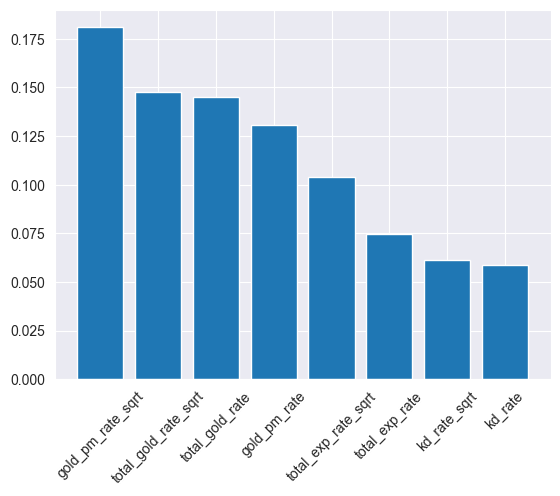

In [535]:
plot_importance(rf_gridSearch.best_estimator_)

### Evaluation of Models

Evaluate random forest model improved from grid-search method.

In [536]:
rf_best = RandomForestClassifier(n_estimators=n_estimators, 
                                 max_depth=depth, 
                                 random_state=RANDOM_STATE)

In [537]:
rf_best.fit(X_train, y_train)
rf_best_pred = rf_best.predict(X_test)
rf_best.score(X_train, y_train)

0.7346348517715112

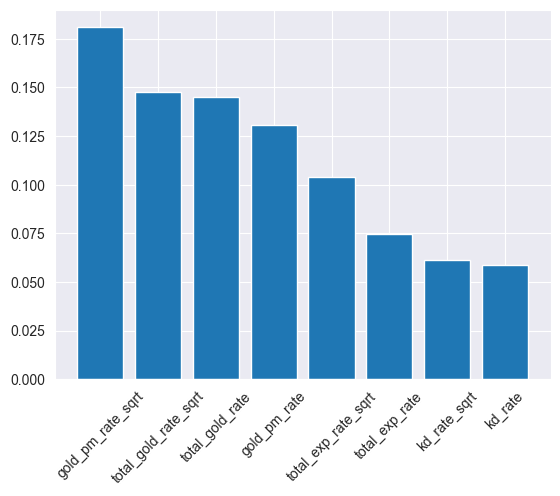

In [538]:
plot_importance(rf_gridSearch.best_estimator_)

In [539]:
cv = 5
samples_lc, cv_train_scores, cv_test_scores = learning_curve(rf_best, X_train, y_train, 
                                                             cv=cv,
                                                             train_sizes=np.linspace(0.1, 1, cv),
                                                             scoring='precision', 
                                                             shuffle=True, 
                                                             random_state=RANDOM_STATE)
samples_lc

array([ 553, 1797, 3042, 4287, 5532])

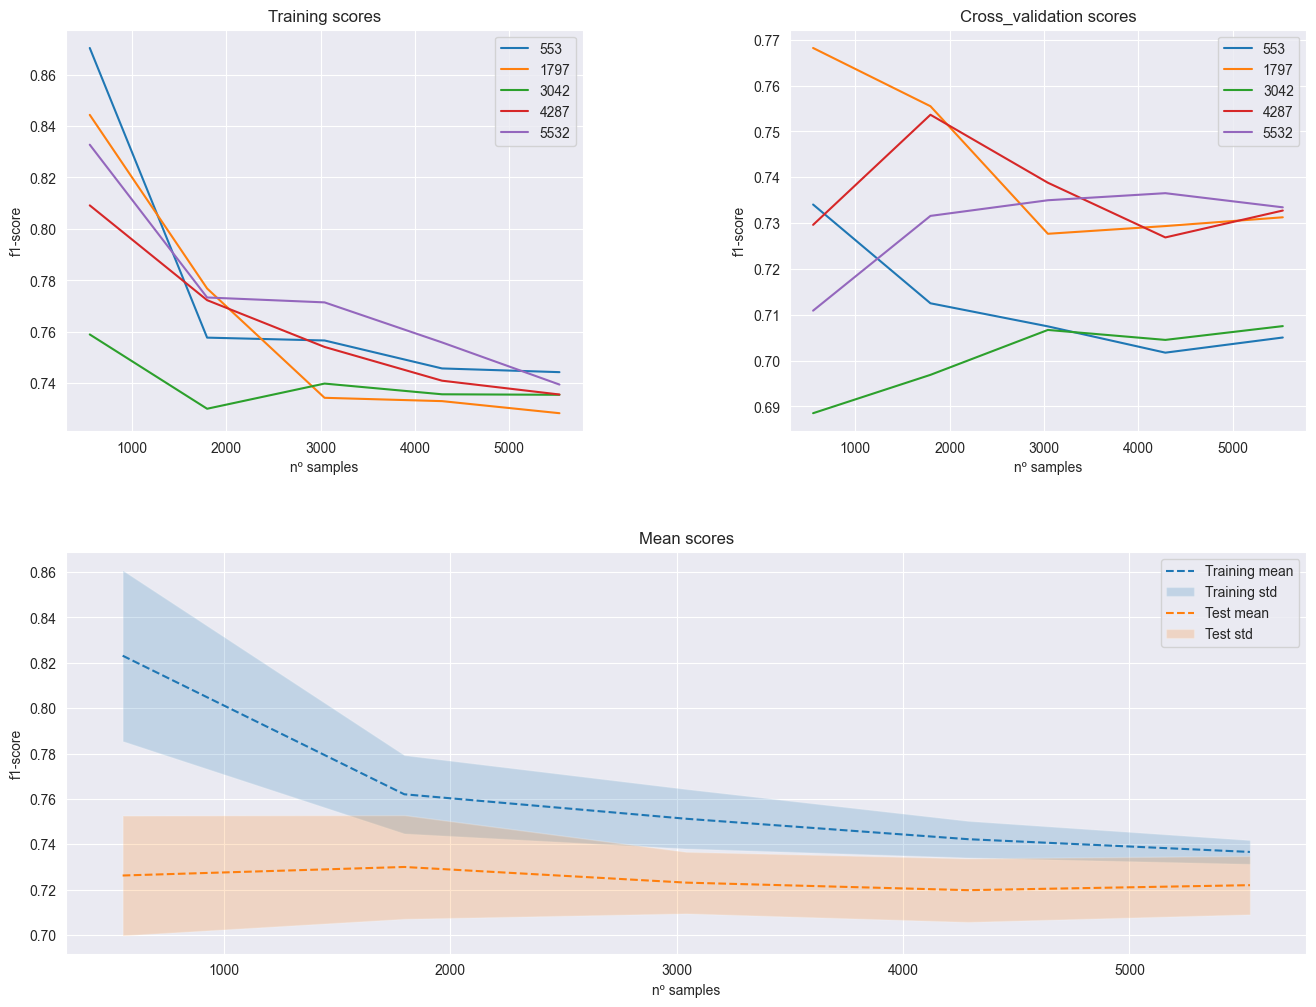

In [540]:
fig = plt.figure(figsize=(16, 12))
grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)

plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1])
plt.subplot(grid[1, 0:])

axes9 = fig.get_axes()

for i, (ax, scores, title) in enumerate(zip(axes9, [cv_train_scores, cv_test_scores], ['Training', 'Cross_validation'])):
    labels = samples_lc
    ax.plot(samples_lc, scores) 

    ax.grid(visible=True)
    ax.set_title(title + ' scores')
    ax.set_xlabel('nº samples')
    ax.set_ylabel('f1-score')
    ax.legend(labels)

labels = ['Training mean', 'Training std', 'Test mean', 'Test std']

for scores in [cv_train_scores, cv_test_scores]:
    # shape of scores: (scores_cv_i, scores_set_i)
    mean_scores = scores.mean(axis=1)
    std_scores = scores.std(axis=1)
    axes9[2].plot(samples_lc, mean_scores, linestyle='--')
    axes9[2].fill_between(samples_lc, mean_scores + std_scores, mean_scores - std_scores, alpha=0.2)

    axes9[2].grid(visible=True)
    axes9[2].set_title('Mean scores')
    axes9[2].set_xlabel('nº samples')
    axes9[2].set_ylabel('f1-score')
    axes9[2].legend(labels)

In [ ]:
for idx_train, idx_test in KFold(5, shuffle=False).split(X_train, y_train):
    print(np.unique(y_train[idx_train], return_counts=True)[1].mean(), np.unique(y_train[idx_test], return_counts=True)[1].mean())

print()
for idx_train, idx_test in KFold(5, shuffle=True, random_state=RANDOM_STATE).split(X_train, y_train):
    print(np.unique(y_train[idx_train], return_counts=True)[1].mean(), np.unique(y_train[idx_test], return_counts=True)[1].mean())